<a href="https://colab.research.google.com/github/DilaraSaruhan/Data-Mining/blob/main/REDandWHITE_WineQualityProject_DataMining_DilaraSaruhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Veri Madenciliği ve Uygulamaları Dersi - BIL542**

---


**Dilara Saruhan** ⭐

---









---



# Red Wine Quality 🍷


1) Veri tanıtımı

2) Veri istatistiksel bilgileri (ort, %25%50%75 medyan, std. Sap. Varyans)

3) Koralasyon (Heat Map)

4) En değerli nitelik

5) Sınıflandırma veya Regresyon analizi

6) Naive Bayes, kNN, Karar ağacı C4.5

7) Random Forest

8) XgBoost

9) AdaBoost

10) SVM

11) ANN

12) Deep Learning CNN




In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from google.colab import data_table
from vega_datasets import data

# Google Drive'ı '/content/drive' dizinine bağladım
drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('drive/My Drive/Colab_Datasets/winequality-red.csv', sep=';')

# 1)VERİNİN TANIMI
data.columns
data.head()

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
# 2)VERİNİN İSTATİKSEL BİLGİLERİ
#Ortalama, %25 %50 %75 medyan, Standart Sapma
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [59]:
#Varyans

data.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [60]:
#3) KORELASYON (Heat Map)
corr = data.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<ipython-input-61-01fdd9e1da33>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


<Axes: >

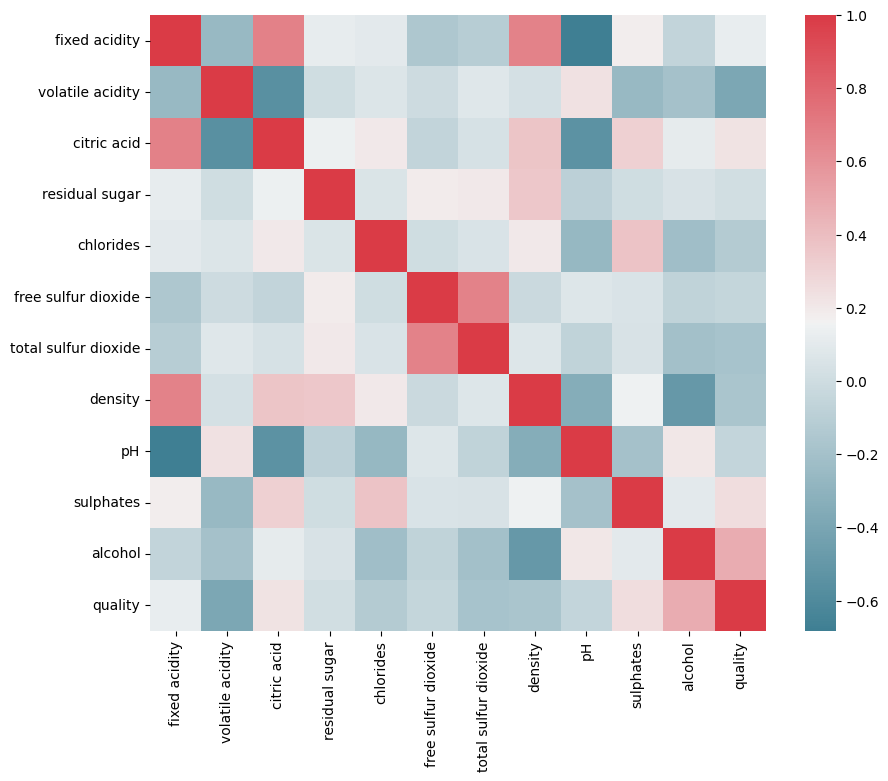

In [61]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [62]:
# 4) EN DEĞERLİ NİTELİK
#En yüksek korelasyon sitrik asit ve sabit asitlik arasında

top_pairs = corr.unstack().sort_values(ascending=False)[12:13]
print(top_pairs)

citric acid  fixed acidity    0.671703
dtype: float64


In [63]:
# 5) REGRESYON ANALİZİ

# Bağımlı ve bağımsız değişkenleri ayır
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

# Veri setini eğitim ve test verisi olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Çoklu regresyon modelini oluştur ve eğit
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = regressor.predict(X_test)

# Regresyon katsayılarını ve sabit terimi yazdır
print("Regresyon katsayıları:", regressor.coef_)
print("Sabit terim:", regressor.intercept_)

# Modelin performansını değerlendir
print("Ortalama karesel hata:", mean_squared_error(y_test, y_pred))
print("R kare değeri:", r2_score(y_test, y_pred))

Regresyon katsayıları: [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
Sabit terim: 34.99871062872121
Ortalama karesel hata: 0.3844711978201242
R kare değeri: 0.3283887639580225


In [64]:
# 6.1) NAIVE-BAYES

# Bağımlı ve bağımsız değişkenleri ayır
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizasyon uygula
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive bayes modeli oluştur ve eğit
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = classifier.predict(X_test)

# Doğruluk oranını ve karışıklık matrisini hesapla
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Sonuçları yazdır
print("Doğruluk oranı: ", accuracy)
print("Karışıklık matrisi: \n", cm)

Doğruluk oranı:  0.545
Karışıklık matrisi: 
 [[  0   0   1   1   0   0]
 [  0   0   8   6   0   0]
 [  3   7 110  41   8   0]
 [  0   4  42  85  34   5]
 [  1   0   0  13  23   3]
 [  0   0   0   2   3   0]]


In [65]:
# 6.2) K-NN

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNeighborsClassifier nesnesi oluşturun ve kNN parametrelerini ayarlayın
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')

# KNeighborsClassifier nesnesini eğitim verilerine uydurun
knn.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = knn.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.45
Precision: 0.23
Recall: 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# 6.3) C4.5 KARAR AĞACI

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DecisionTreeClassifier nesnesi oluşturun ve C4.5 parametrelerini ayarlayın
dt = DecisionTreeClassifier(criterion='entropy', splitter='best')

# DecisionTreeClassifier nesnesini eğitim verilerine entegrasyon
dt.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminleri
y_pred = dt.predict(X_test)

# Modelin performansını değerlendirmek için metrikler
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.59
Precision: 0.35
Recall: 0.36


In [67]:
# 7) RANDOM FOREST

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestClassifier nesnesi oluşturun ve random forest parametrelerini ayarlayın
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None)

# RandomForestClassifier nesnesini eğitim verilerine uydurun
rf.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = rf.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.63
Precision: 0.37
Recall: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# 8) XGBoost

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = LabelEncoder().fit_transform(data.iloc[:, -1].values) # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBClassifier nesnesi oluşturun ve XGBoost parametrelerini ayarlayın
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

xgb.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = xgb.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.53
Precision: 0.25
Recall: 0.24


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# 9) AdaBoost

# Veri kümesini eğitim ve test setlerine bölün

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoostClassifier nesnesi oluşturun ve AdaBoost parametrelerini ayarlayın
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1, base_estimator=DecisionTreeClassifier())

# AdaBoostClassifier nesnesini eğitim verilerine uydurun
abc.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = abc.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.56
Precision: 0.35
Recall: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [70]:
# 10) SVM
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVC nesnesi oluşturun ve istediğiniz çekirdek fonksiyonunu ve diğer parametreleri ayarlayın
svc = SVC(kernel='rbf', gamma=0.1, C=1)

# SVC nesnesini eğitim verilerine uydurun
svc.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = svc.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.56
Precision: 0.28
Recall: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# 11) ANN

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MLPClassifier nesnesi oluşturun ve istediğiniz katman sayısını, aktivasyon fonksiyonunu ve diğer parametreleri ayarlayın
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=1000)

# MLPClassifier nesnesini eğitim verilerine uydurun
mlp.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = mlp.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.57
Precision: 0.26
Recall: 0.26


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# 12) CNN

# Veri kümesini eğitim ve test setlerine bölün

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Conv1D ve MaxPooling1D katmanlarından oluşan bir evrişimli taban oluşturun
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(11, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Evrişimli tabana yoğun katmanlar ekleyin
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))

# Modeli derleyin ve eğitin
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/10
35/35 [==============================] - 1s 3ms/step - loss: 1.4178 - accuracy: 0.4638
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 1.2025 - accuracy: 0.4969
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 1.1754 - accuracy: 0.4951
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1644 - accuracy: 0.4942
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1853 - accuracy: 0.4933
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.5112
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1431 - accuracy: 0.4897
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1508 - accuracy: 0.4870
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1428 - accuracy: 0.5103
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 1.1413 - accuracy: 0.5022
15/15 - 0s - loss: 

# White Wine Quality 🍷


1) Veri tanıtımı

2) Veri istatistiksel bilgileri (ort, %25%50%75 medyan, std. Sap. Varyans)

3) Koralasyon (Heat Map)

4) En değerli nitelik

5) Sınıflandırma veya Regresyon analizi

6) Naive Bayes, kNN, Karar ağacı C4.5

7) Random Forest

8) XgBoost

9) AdaBoost

10) SVM

11) ANN

12) Deep Learning CNN




In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from google.colab import data_table
from vega_datasets import data

# Google Drive'ı '/content/drive' dizinine bağladım
drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('drive/My Drive/Colab_Datasets/winequality-white.csv', sep=';')

# 1)VERİNİN TANIMI
data.columns
data.head()

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
# 2)VERİNİN İSTATİKSEL BİLGİLERİ
#Ortalama, %25 %50 %75 medyan, Standart Sapma
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [41]:
#Varyans

data.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

In [42]:
#3) KORELASYON (Heat Map)
corr = data.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<ipython-input-43-01fdd9e1da33>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


<Axes: >

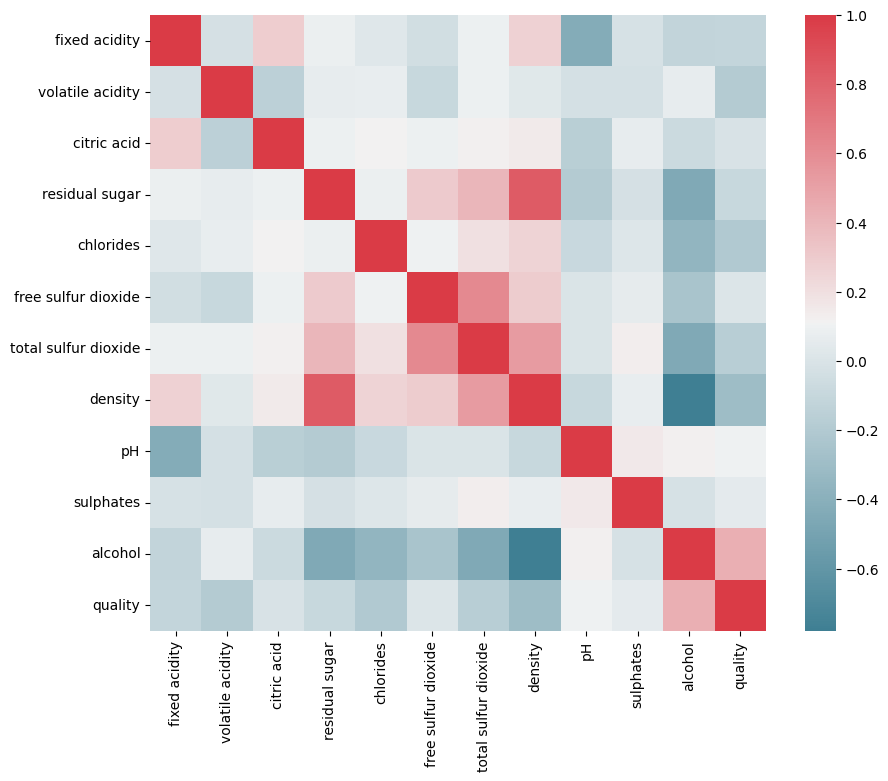

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [44]:
# 4) EN DEĞERLİ NİTELİK
#En yüksek korelasyon sitrik asit ve sabit asitlik arasında

top_pairs = corr.unstack().sort_values(ascending=False)[12:13]
print(top_pairs)

density  residual sugar    0.838966
dtype: float64


In [45]:
# 5) REGRESYON ANALİZİ

# Bağımlı ve bağımsız değişkenleri ayır
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

# Veri setini eğitim ve test verisi olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Çoklu regresyon modelini oluştur ve eğit
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = regressor.predict(X_test)

# Regresyon katsayılarını ve sabit terimi yazdır
print("Regresyon katsayıları:", regressor.coef_)
print("Sabit terim:", regressor.intercept_)

# Modelin performansını değerlendir
print("Ortalama karesel hata:", mean_squared_error(y_test, y_pred))
print("R kare değeri:", r2_score(y_test, y_pred))

Regresyon katsayıları: [ 1.06981517e-01 -1.81032516e+00 -1.51630286e-02  9.29140769e-02
 -5.56723628e-01  4.43552129e-03 -2.86630409e-04 -1.88992556e+02
  8.22368627e-01  6.38975597e-01  1.37843182e-01]
Sabit terim: 188.4592953207619
Ortalama karesel hata: 0.6598453517957372
R kare değeri: 0.2513476761101908


In [46]:
# 6.1) NAIVE-BAYES

# Bağımlı ve bağımsız değişkenleri ayır
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizasyon uygula
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive bayes modeli oluştur ve eğit
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = classifier.predict(X_test)

# Doğruluk oranını ve karışıklık matrisini hesapla
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Sonuçları yazdır
print("Doğruluk oranı: ", accuracy)
print("Karışıklık matrisi: \n", cm)

Doğruluk oranı:  0.4473469387755102
Karışıklık matrisi: 
 [[  3   3   0   2   1   0]
 [  1  13  19  20   4   0]
 [  3  12 191 135  34   0]
 [  6   7 130 195 183   1]
 [  0   0  21  55 144   3]
 [  0   0   3  11  23   2]]


In [47]:
# 6.2) K-NN

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNeighborsClassifier nesnesi oluşturun ve kNN parametrelerini ayarlayın
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')

# KNeighborsClassifier nesnesini eğitim verilerine uydurun
knn.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = knn.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.48
Precision: 0.35
Recall: 0.32


In [48]:
# 6.3) C4.5 KARAR AĞACI

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DecisionTreeClassifier nesnesi oluşturun ve C4.5 parametrelerini ayarlayın
dt = DecisionTreeClassifier(criterion='entropy', splitter='best')

# DecisionTreeClassifier nesnesini eğitim verilerine entegrasyon
dt.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminleri
y_pred = dt.predict(X_test)

# Modelin performansını değerlendirmek için metrikler
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.59
Precision: 0.36
Recall: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# 7) RANDOM FOREST

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestClassifier nesnesi oluşturun ve random forest parametrelerini ayarlayın
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None)

# RandomForestClassifier nesnesini eğitim verilerine uydurun
rf.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = rf.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.65
Precision: 0.54
Recall: 0.42


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# 8) XGBoost

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = LabelEncoder().fit_transform(data.iloc[:, -1].values) # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBClassifier nesnesi oluşturun ve XGBoost parametrelerini ayarlayın
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

xgb.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = xgb.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.53
Precision: 0.49
Recall: 0.28


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# 9) AdaBoost

# Veri kümesini eğitim ve test setlerine bölün

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoostClassifier nesnesi oluşturun ve AdaBoost parametrelerini ayarlayın
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1, base_estimator=DecisionTreeClassifier())

# AdaBoostClassifier nesnesini eğitim verilerine uydurun
abc.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = abc.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.59
Precision: 0.34
Recall: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# 10) SVM
X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVC nesnesi oluşturun ve istediğiniz çekirdek fonksiyonunu ve diğer parametreleri ayarlayın
svc = SVC(kernel='rbf', gamma=0.1, C=1)

# SVC nesnesini eğitim verilerine uydurun
svc.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = svc.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.57
Precision: 0.44
Recall: 0.29


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# 11) ANN

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MLPClassifier nesnesi oluşturun ve istediğiniz katman sayısını, aktivasyon fonksiyonunu ve diğer parametreleri ayarlayın
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=1000)

# MLPClassifier nesnesini eğitim verilerine uydurun
mlp.fit(X_train, y_train)

# Test verilerini kullanarak modelin tahminlerini alın
y_pred = mlp.predict(X_test)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.51
Precision: 0.17
Recall: 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# 12) CNN

# Veri kümesini eğitim ve test setlerine bölün

X = data.iloc[:, :-1].values # Bağımsız değişkenler matrisi
y = data.iloc[:, -1].values # Bağımlı değişken vektörü

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Conv1D ve MaxPooling1D katmanlarından oluşan bir evrişimli taban oluşturun
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(11, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Evrişimli tabana yoğun katmanlar ekleyin
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))

# Modeli derleyin ve eğitin
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

# Modelin performansını değerlendirmek için metrikleri hesaplayın
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/10
108/108 [==============================] - 2s 4ms/step - loss: 2.0760 - accuracy: 0.3769
Epoch 2/10
108/108 [==============================] - 0s 4ms/step - loss: 1.3156 - accuracy: 0.4306
Epoch 3/10
108/108 [==============================] - 0s 4ms/step - loss: 1.3469 - accuracy: 0.4145
Epoch 4/10
108/108 [==============================] - 0s 4ms/step - loss: 1.3114 - accuracy: 0.4291
Epoch 5/10
108/108 [==============================] - 0s 4ms/step - loss: 1.3240 - accuracy: 0.4242
Epoch 6/10
108/108 [==============================] - 0s 4ms/step - loss: 1.3101 - accuracy: 0.4189
Epoch 7/10
108/108 [==============================] - 0s 4ms/step - loss: 1.2863 - accuracy: 0.4501
Epoch 8/10
108/108 [==============================] - 0s 4ms/step - loss: 1.2905 - accuracy: 0.4370
Epoch 9/10
108/108 [==============================] - 0s 4ms/step - loss: 1.2733 - accuracy: 0.4335
Epoch 10/10
108/108 [==============================] - 0s 4ms/step - loss: 1.2856 - accuracy: 0.4425